In [7]:
import numpy as np
import pandas as pd

In [8]:
metrics_standard_swissex = [[55.769230769230774, 50.28156326069039],
 [74.03846153846155, 73.01337668628018],
 [13.461538461538462, 7.744107744107744],
 [37.3832, 0.0],
 [31.7307, 26.8516]]
metrics_norm_swissex = [[47.11538461538461, 44.190030244291215],
 [44.230769230769226, 39.549552875768214],
 [20.192307692307693, 3.0545454545454547],
 [44.2308, 0.0],
 [29.8076, 19.8315]]

In [9]:
metrics_standard_things = [[70.80062794348508, 46.79873701873521],
 [73.31240188383046, 51.522648655249235],
 [1.4128728414442702, 0.14665145836728044],
 [41.4443, 0.0],
 [29.6703, 10.2272]]
metrics_norm_things = [[66.56200941915228, 40.907245520334165],
 [55.88697017268446, 38.05249139559277],
 [18.367346938775512, 1.633393829401089],
 [41.6013, 0.0],
 [24.0188, 4.8623]]

In [10]:
metrics_standard_urban = [[76.875, 65.57010767033901],
 [90.0, 82.51276526485381],
 [6.875000000000001, 0.9963768115942028],
 [74.6875, 0.0],
 [47.1875, 27.92945]]
metrics_norm_urban = [[67.1875, 55.69969038007463],
 [81.5625, 72.58668199378478],
 [26.25, 8.837608387100772],
 [75.3125, 0.0],
 [36.25, 23.2135]]

In [11]:
import matplotlib.pyplot as plt

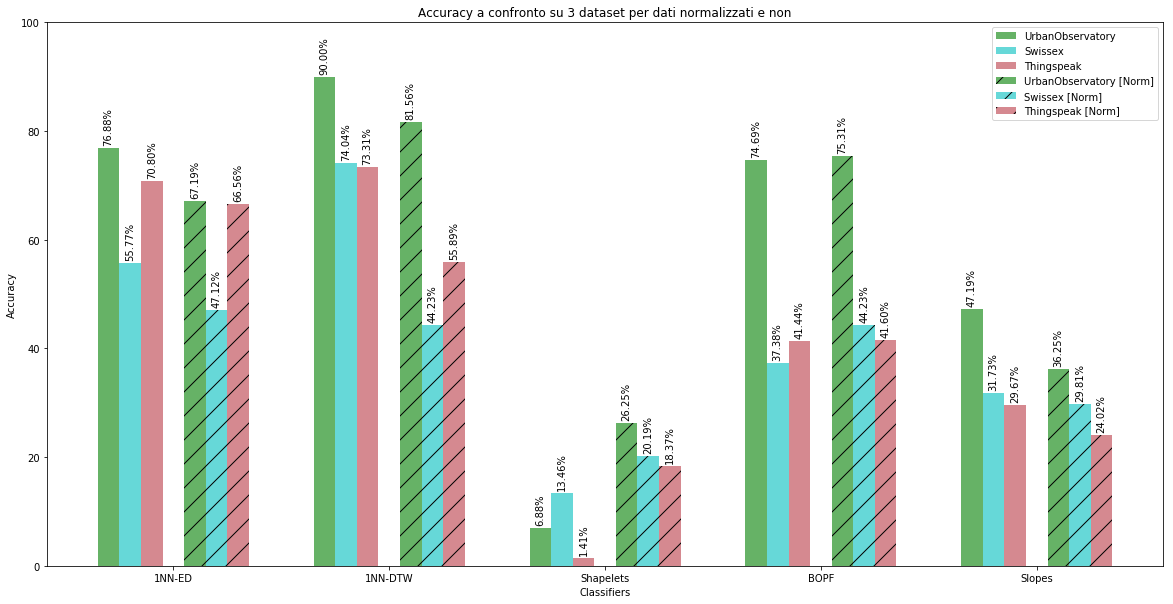

In [14]:
fig, ax = plt.subplots(figsize=(20,10))
index = np.arange(5)
bar_width = 0.1

labels = ['1NN-ED', '1NN-DTW', 'Shapelets', 'BOPF', 'Slopes']
opacity = .6
error_config = {'ecolor': '0.3'}
    
urban_ax = ax.bar(index - 3*bar_width, [y[0] for y in metrics_standard_urban], bar_width, alpha=opacity, color='g', error_kw=error_config, label='UrbanObservatory')
swissex_ax = ax.bar(index - 2*bar_width, [y[0] for y in metrics_standard_swissex], bar_width, alpha=opacity, color='c', error_kw=error_config, label='Swissex')
things_ax = ax.bar(index - bar_width, [y[0] for y in metrics_standard_things], bar_width, alpha=opacity, color='#BA3B46', error_kw=error_config, label='Thingspeak')

urban_ax_norm = ax.bar(index + bar_width, [y[0] for y in metrics_norm_urban], bar_width, alpha=opacity, color='g', error_kw=error_config, label='UrbanObservatory [Norm]', hatch="/")
swissex_ax_norm = ax.bar(index + 2*bar_width, [y[0] for y in metrics_norm_swissex], bar_width, alpha=opacity, color='c', error_kw=error_config, label='Swissex [Norm]', hatch="/")
things_ax_norm = ax.bar(index + 3*bar_width, [y[0] for y in metrics_norm_things], bar_width, alpha=opacity, color='#BA3B46', error_kw=error_config, label='Thingspeak [Norm]', hatch="/")
    
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}%'.format(round(height, 4)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation = 90)
autolabel(things_ax)
autolabel(swissex_ax)
autolabel(urban_ax)

autolabel(things_ax_norm)
autolabel(swissex_ax_norm)
autolabel(urban_ax_norm)
    
ax.set_title('Accuracy a confronto su 3 dataset per dati normalizzati e non')
ax.set_ylim(0, 100)
ax.set_xlabel('Classifiers')
ax.set_ylabel('Accuracy')
ax.set_xticks(index)
ax.set_xticklabels((labels))
ax.legend()
plt.savefig('TSC_Algorithms.png', bbox_inches='tight',pad_inches = 0, dpi = 200)
plt.show()